## SMS spam classification
This notebook gives a short tutorial on SMS spam classification using huggingface🤗 FSL approach: `SetFit`.

For more detailed approach to a similar problem, please refer to other notebook: `train_sentiment.ipynb`

In [1]:
from datasets import load_dataset, concatenate_datasets
from text_classification.classifier import Classifier
from matplotlib import pyplot as plt

In [2]:
# Data preparation

dataset = load_dataset("sms_spam")
dataset = dataset['train'].train_test_split(test_size=0.3)  # this dataset has only 'train' component

train_ds, test_ds = dataset['train'], dataset['test']
train_ds, test_ds

(Dataset({
     features: ['sms', 'label'],
     num_rows: 3901
 }),
 Dataset({
     features: ['sms', 'label'],
     num_rows: 1673
 }))

## Training the model

In [3]:
# if running on CPU, comment this cell as it is only used to demonstrate how performance scales with the number of examples.

accuracy = []
SAMPLES_PER_CLASS_LIST = [2,4,8,16,32]

for SAMPLES_PER_CLASS in SAMPLES_PER_CLASS_LIST:

    classifier = Classifier(model_name="sentence-transformers/paraphrase-mpnet-base-v2", cache_dir=".pre-trained-models/")
    train_ds = concatenate_datasets(
        [dataset['train'].shuffle(seed=42).filter(lambda x: x['label'] == label_id).select(range(SAMPLES_PER_CLASS)) for label_id in [0, 1]]
    ).shuffle(seed=42)

    performance_metrics = classifier.train(
        train_ds=concatenate_datasets([train_ds.shuffle(seed=42).filter(lambda x: x['label'] == label_id).select(range(SAMPLES_PER_CLASS)) for label_id in [0, 1]]).shuffle(seed=42), 
        test_ds=test_ds, 
        batch_size=16, 
        num_iterations=20,
        num_epochs=2, 
        column_mapping={'label':'label', 'sms':'text'}
    )

    accuracy.append(performance_metrics['accuracy'])
    print(performance_metrics['accuracy'])

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


Filter:   0%|          | 0/3901 [00:00<?, ? examples/s]

Filter:   0%|          | 0/3901 [00:00<?, ? examples/s]

Filter:   0%|          | 0/4 [00:00<?, ? examples/s]

Filter:   0%|          | 0/4 [00:00<?, ? examples/s]

Applying column mapping to training dataset


Generating Training Pairs:   0%|          | 0/20 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 160
  Num epochs = 2
  Total optimization steps = 20
  Total train batch size = 16


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****


0.7913927077106994


model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


Filter:   0%|          | 0/8 [00:00<?, ? examples/s]

Filter:   0%|          | 0/8 [00:00<?, ? examples/s]

Applying column mapping to training dataset


Generating Training Pairs:   0%|          | 0/20 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 320
  Num epochs = 2
  Total optimization steps = 40
  Total train batch size = 16


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/20 [00:00<?, ?it/s]

Iteration:   0%|          | 0/20 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****


0.8906156604901375


model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


Filter:   0%|          | 0/16 [00:00<?, ? examples/s]

Filter:   0%|          | 0/16 [00:00<?, ? examples/s]

Applying column mapping to training dataset


Generating Training Pairs:   0%|          | 0/20 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 640
  Num epochs = 2
  Total optimization steps = 80
  Total train batch size = 16


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****


0.9372384937238494


model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


Filter:   0%|          | 0/32 [00:00<?, ? examples/s]

Filter:   0%|          | 0/32 [00:00<?, ? examples/s]

Applying column mapping to training dataset


Generating Training Pairs:   0%|          | 0/20 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 1280
  Num epochs = 2
  Total optimization steps = 160
  Total train batch size = 16


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/80 [00:00<?, ?it/s]

Iteration:   0%|          | 0/80 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****


0.9736999402271369


model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


Filter:   0%|          | 0/64 [00:00<?, ? examples/s]

Filter:   0%|          | 0/64 [00:00<?, ? examples/s]

Applying column mapping to training dataset


Generating Training Pairs:   0%|          | 0/20 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 2560
  Num epochs = 2
  Total optimization steps = 320
  Total train batch size = 16


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/160 [00:00<?, ?it/s]

Iteration:   0%|          | 0/160 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****


0.9802749551703527


Text(0.5, 1.0, 'Accuracy vs. Number of samples per class')

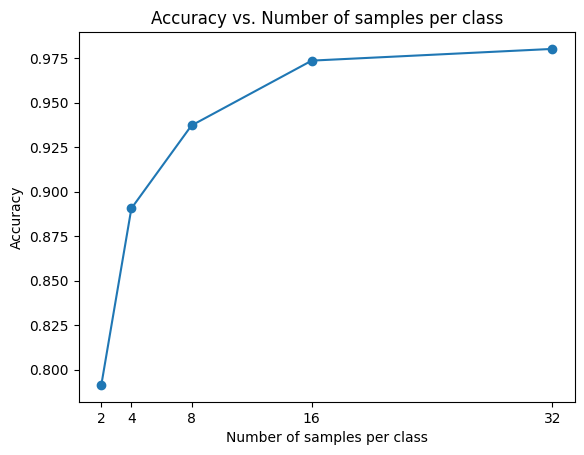

In [4]:
# plot the model
plt.plot(SAMPLES_PER_CLASS_LIST, accuracy, "-o")
plt.xticks(SAMPLES_PER_CLASS_LIST)
plt.xlabel('Number of samples per class')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of samples per class')